In [1]:
import torch 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch.nn as nn

In [4]:
x = torch.linspace(1,50,50).reshape(-1,1)

In [5]:
x

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [6]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [7]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [8]:
y  = 2*x +1 +e

In [9]:
y.shape

torch.Size([50, 1])

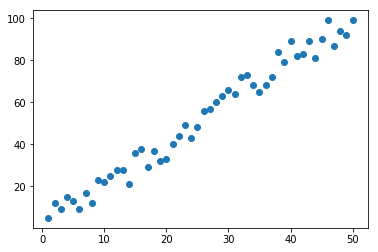

In [10]:
plt.scatter(x.numpy(),y.numpy())

In [11]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [12]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [13]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [14]:
for name,param in model.named_parameters():
    print(name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [15]:
# x = torch.tensor([2.0])
# print(model.forward(x))

In [16]:
x1 = np.linspace(0.0,50.0,50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [17]:
w1 = 0.1060
b1 = 0.9638

y1 =  w1*x1 +b1

In [18]:
y1


array([0.9638    , 1.07196327, 1.18012653, 1.2882898 , 1.39645306,
       1.50461633, 1.61277959, 1.72094286, 1.82910612, 1.93726939,
       2.04543265, 2.15359592, 2.26175918, 2.36992245, 2.47808571,
       2.58624898, 2.69441224, 2.80257551, 2.91073878, 3.01890204,
       3.12706531, 3.23522857, 3.34339184, 3.4515551 , 3.55971837,
       3.66788163, 3.7760449 , 3.88420816, 3.99237143, 4.10053469,
       4.20869796, 4.31686122, 4.42502449, 4.53318776, 4.64135102,
       4.74951429, 4.85767755, 4.96584082, 5.07400408, 5.18216735,
       5.29033061, 5.39849388, 5.50665714, 5.61482041, 5.72298367,
       5.83114694, 5.9393102 , 6.04747347, 6.15563673, 6.2638    ])

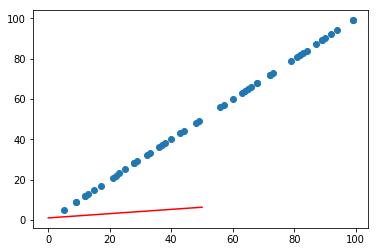

In [19]:
plt.scatter(y.numpy(),y.numpy())
plt.plot(x1,y1,'r')

In [20]:
criterion = nn.MSELoss()

In [21]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [22]:
epochs = 90 
losses = []

for i in range(epochs):
    i +=1
    # Predicting on the forward pass
    y_pred = model.forward(x)
    # Calculate our loss (error)
    loss = criterion(y_pred,y)
    # Record that error
    losses.append(loss)
    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 1588.531005859375 weight: 3.334900379180908 bias: 1.0604636669158936
epoch 3 loss: 830.3001098632812 weight: 1.0148327350616455 bias: 0.9922627806663513
epoch 4 loss: 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741
epoch 5 loss: 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss: 78.56572723388672 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss: 28.989227294921875 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss: 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.0291162729

Text(0.5, 0, 'Epoch')

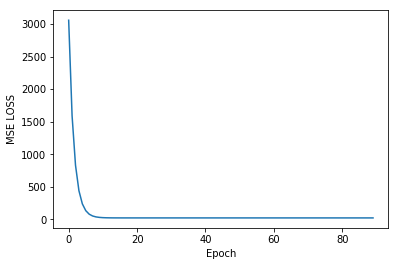

In [23]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')

In [24]:
#x = np.linspace(0.0,50.0,50)
w1 = model.linear.weight.item()
b1= model.linear.bias.item()
y1 = x1*w1 + b1
print(x1)
print(y1)

[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]
[  1.08403158   3.10747984   5.13092811   7.15437637   9.17782463
  11.2012729   13.22472116  15.24816942  17.27161769  19.29506595
  21.31851421  23.34196247  25.36541074  27.388859    29.41230726
  31.43575553  33.45920379  35.48265205  37.50610031  39.52954858
  41.55299684  43.5764451   45.59989337  47.62334163  49.64678989
  51.67023815  53.69368642  55.71713468  57.74058294  59.7640

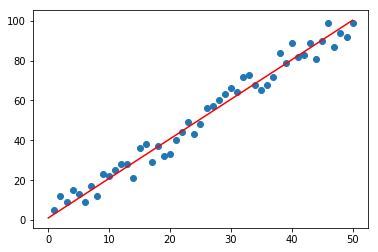

In [25]:
plt.scatter(x.numpy(),y.numpy())
plt.plot(x1,y1,'r')